In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv('diabetes.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
print("Total missing values:", df.isnull().sum().sum())


Total missing values: 0


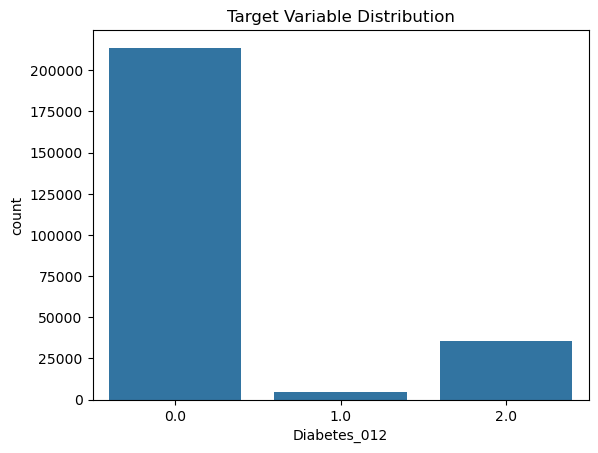

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Diabetes_012", data=df)
plt.title("Target Variable Distribution")
plt.show()

In [7]:
# Convert to binary target
df["Diabetes"] = df["Diabetes_012"].apply(lambda x: 1 if x == 2 else 0)

# Drop original column
df.drop(columns=["Diabetes_012"], inplace=True)


In [8]:
X = df.drop("Diabetes", axis=1)
y = df["Diabetes"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


In [11]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [13]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }


In [19]:
lr_results = evaluate_model(y_test, lr_preds)
rf_results = evaluate_model(y_test, rf_preds)

print("Logistic Regression:")
for k, v in lr_results.items():
    print(f"{k}: {v:.4f}")

print("\nRandom Forest:")
for k, v in rf_results.items():
    print(f"{k}: {v:.4f}")


Logistic Regression:
Accuracy: 0.8621
Precision: 0.5171
Recall: 0.1583
F1 Score: 0.2424

Random Forest:
Accuracy: 0.8644
Precision: 0.5878
Recall: 0.0900
F1 Score: 0.1561


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_split=10,
    random_state=42
)

dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)


In [18]:
accuracy = accuracy_score(y_test, dt_preds)
precision = precision_score(y_test, dt_preds)
recall = recall_score(y_test, dt_preds)
f1 = f1_score(y_test, dt_preds)

print("Decision Tree:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Decision Tree:
Accuracy : 0.8622
Precision: 0.5177
Recall   : 0.1610
F1 Score : 0.2456
